<a href="https://colab.research.google.com/github/himabindhu717/Generative-AI-2025/blob/main/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


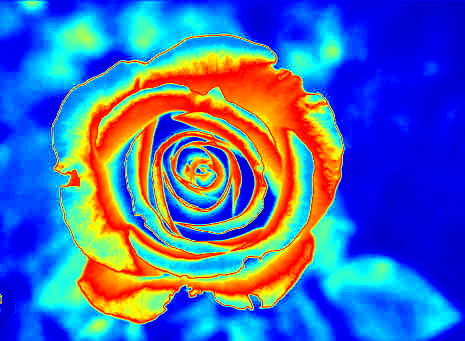

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Predicted class index: 506
Predicted class label: coil, spiral, volute, whorl, helix


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from transformers import ViTForImageClassification, ViTFeatureExtractor
import torch

# Load the black and white image
bw_image = cv2.imread('/content/drive/MyDrive/flower.jpg', cv2.IMREAD_GRAYSCALE)

# Apply a color map
colorized_image = cv2.applyColorMap(bw_image, cv2.COLORMAP_JET)

# Display the colorized image
cv2_imshow(colorized_image)

# Save the colorized image
cv2.imwrite('/content/drive/MyDrive/flower.jpg', colorized_image)

# Load a pre-trained Vision Transformer (ViT) model and feature extractor
model_name = "google/vit-base-patch16-224"
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
model = ViTForImageClassification.from_pretrained(model_name)

# Preprocess the colorized image for the model
inputs = feature_extractor(images=colorized_image, return_tensors="pt")

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted class
logits = outputs.logits
predicted_class_idx = logits.argmax(-1).item()

# Print the predicted class
print(f"Predicted class index: {predicted_class_idx}")
print(f"Predicted class label: {model.config.id2label[predicted_class_idx]}")

cv2.waitKey(0)
cv2.destroyAllWindows()

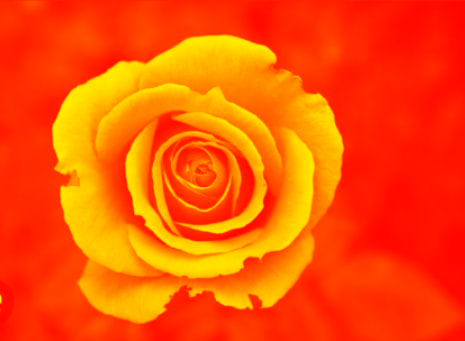

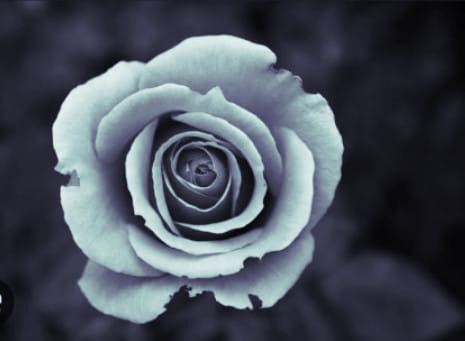

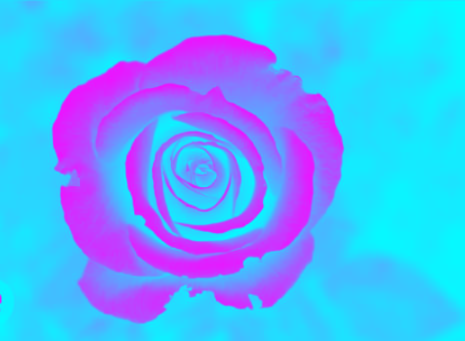

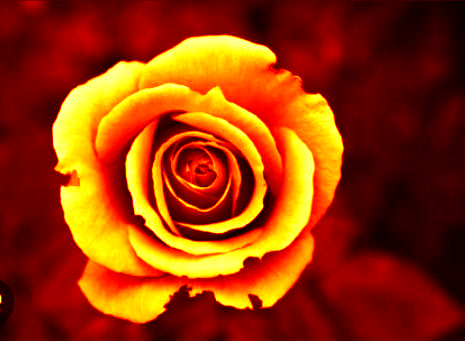

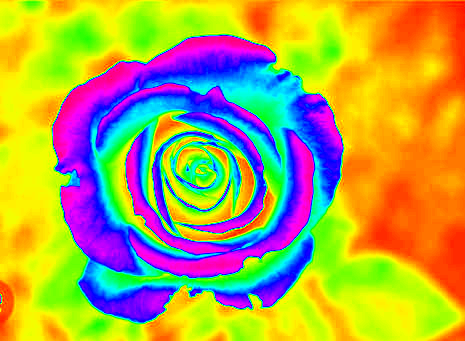

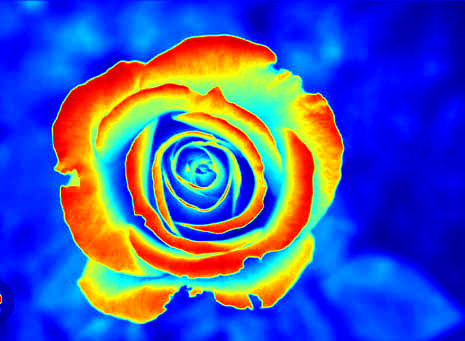

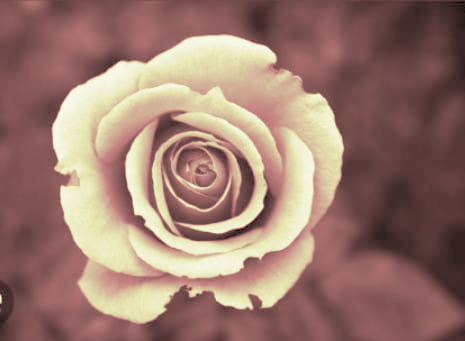

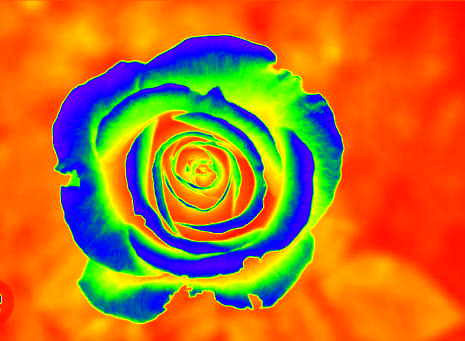

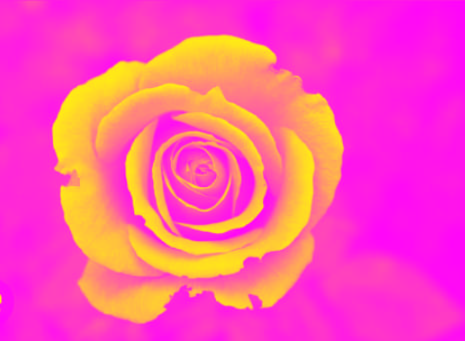

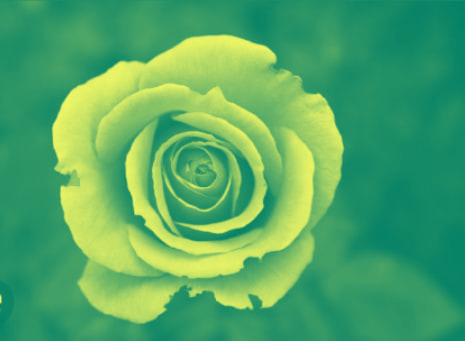

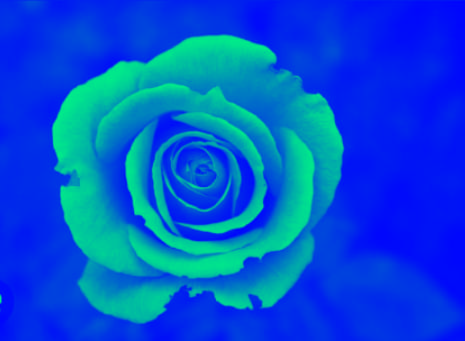

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the black and white image
bw_image = cv2.imread('/content/drive/MyDrive/flower.jpg', cv2.IMREAD_GRAYSCALE)

# List of available color maps
color_maps = [
    cv2.COLORMAP_AUTUMN,
    cv2.COLORMAP_BONE,
    cv2.COLORMAP_COOL,
    cv2.COLORMAP_HOT,
    cv2.COLORMAP_HSV,
    cv2.COLORMAP_JET,
    cv2.COLORMAP_PINK,
    cv2.COLORMAP_RAINBOW,
    cv2.COLORMAP_SPRING,
    cv2.COLORMAP_SUMMER,
    cv2.COLORMAP_WINTER
]

# Apply each color map and display the result
for cmap in color_maps:
    colorized_image = cv2.applyColorMap(bw_image, cmap)
    cv2_imshow(colorized_image)
    cv2.waitKey(0)

cv2.destroyAllWindows()

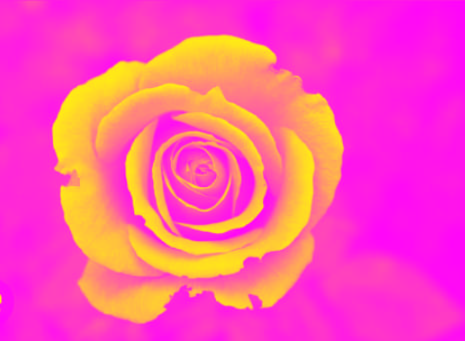

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the black and white image
bw_image = cv2.imread('/content/drive/MyDrive/flower.jpg', cv2.IMREAD_GRAYSCALE)

# Create a custom color map
# This is a simple example: a gradient from blue to yellow
custom_colormap = np.zeros((256, 1, 3), dtype=np.uint8)
for i in range(256):
    custom_colormap[i, 0, 0] = 255 - i  # Blue decreases
    custom_colormap[i, 0, 1] = i        # Green increases
    custom_colormap[i, 0, 2] = 255      # Red constant (yellow)

# Apply the custom color map
colorized_image = cv2.applyColorMap(bw_image, custom_colormap)

# Display the result
cv2_imshow(colorized_image)
cv2.waitKey(0)
cv2.destroyAllWindows()